In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control import cost_functions as cost_functions

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

# We define colors for later convenience
color_e = 'red'
color_i = 'blue'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
# define plot function for later convenience
def plot_singlenode(model, duration, dt, state_list, target):
    fig, ax = plt.subplots( len(state_list),1, figsize=(10,2*len(state_list)), constrained_layout=True)

    # Plot the target (dashed line) and unperturbed activity
    t_array = np.arange(0, duration+dt, dt)
    fs_ = 16

    state = state_list[0]

    ax[0].plot(t_array, state[0,0,:], color=color_e, linewidth=1, label="E population")
    ax[0].plot(t_array, state[0,1,:], color=color_i, linewidth=1, label="I population")

    ax[0].legend(loc="upper left", fontsize=fs_)

    for ind in range(1, len(state_list)):
        state = state_list[ind]
        ax[ind].plot(t_array, state[0,0,:], color=color_e, linewidth=1)
        ax[ind].plot(t_array, state[0,1,:], color=color_i, linewidth=1)

        #ax[ind].plot(t_array, target[0,0,:], linestyle='dashed', color=color_x)
        #ax[ind,1].plot(t_array, target[0,1,:], linestyle='dashed', color=color_y)
        
        ax[ind].set_ylabel("Activity", fontsize=fs_)
        #ax[ind,1].set_yticks([])

        ax[ind].tick_params(axis='both', which='major', labelsize=fs_)
        ax[ind].set_xlim(0,duration)
        ax[ind].set_xticks([])


    ax[0].set_title("Uncontrolled", fontsize=fs_)
    ax[1].set_title("1 Iterations", fontsize=fs_)
    ax[2].set_title("10 Iterations", fontsize=fs_)
    ax[3].set_title("40 Iterations", fontsize=fs_)

    ax[-1].set_xticks(np.arange(0,201,50))
    ax[-1].set_xlabel("Time [ms]", fontsize=fs_)

    plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

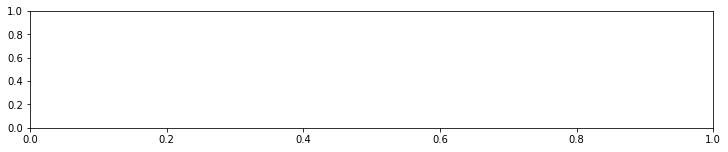

In [59]:
wc = WCModel()
wc.params.sigma_ou = 0.

dt = wc.params["dt"]
duration = 200.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
zero_control = np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]

wc.params["duration"] = duration
x_init = 0.
y_init = 0.
wc.params["exc_init"] = np.array([[x_init]])
wc.params["inh_init"] = np.array([[y_init]])
wc.params["exc_ext"] = zero_input 
wc.params["inh_ext"] = zero_input
wc.run()

target = np.concatenate((np.concatenate( (wc.params["exc_init"], wc.params["inh_init"]), axis=1)[:,:, np.newaxis], np.stack( (wc.exc, wc.inh), axis=1)), axis=2)

wc.params["exc_ext"] = zero_input + 1.5
wc.run()
x_init_osc = np.array([[wc.exc[0,-1]]])
y_init_osc = np.array([[wc.inh[0,-1]]])
wc.params["exc_init"] = x_init_osc
wc.params["inh_init"] = y_init_osc
wc.run()

state_list = []

state_list.append(np.concatenate((np.concatenate( (wc.params["exc_init"], wc.params["inh_init"]), axis=1)[:,:, np.newaxis], np.stack( (wc.exc, wc.inh), axis=1)), axis=2) )

plot_singlenode(wc, duration, dt, state_list, target)

Compute control for a deterministic system
Cost in iteration 0: 54.37707416538903
Cost in iteration 1: 37.46052867758745
Final cost : 37.46052867758745


IndexError: index 2 is out of bounds for axis 0 with size 2

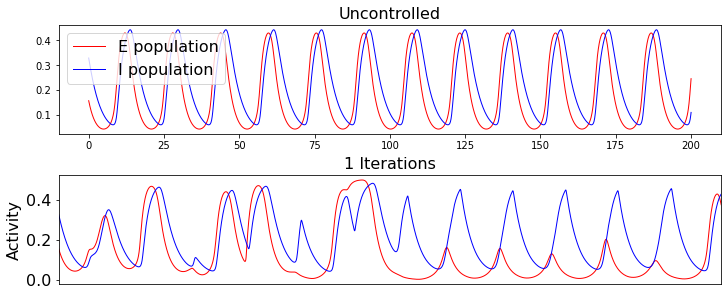

In [60]:
wc.params["exc_ext"] = zero_input + 1.5
wc.params["inh_ext"] = zero_input
w2 = 1e-4
wp = 1.
printarray = np.concatenate( (np.arange(0,101,1), np.arange(200,1001,100)) )
wc_controlled_noisefree = oc_wc.OcWc(wc, target, w_p=wp, w_2=w2, print_array=printarray, precision_cost_interval=(1000,None))

# We run 100 iterations of the optimal control gradient descent algorithm
#wc_controlled_noisefree.step = 4.

control0 = np.zeros((target.shape))
#control0[0,0,1300:] = -1.5
wc_controlled_noisefree.control = control0.copy()
wc_controlled_noisefree.optimize(1)

state_list.append(wc_controlled_noisefree.get_xs() )
control_noisefree = wc_controlled_noisefree.control

plot_singlenode(wc_controlled_noisefree.model, duration, dt, state_list, target)


Compute control for a deterministic system
Cost in iteration 0: 37.46052867758745
Cost in iteration 1: 27.908691472940244
Cost in iteration 2: 22.347854489616726
Cost in iteration 3: 19.272580710194482
Cost in iteration 4: 16.38784163955578
Cost in iteration 5: 14.360470967723074
Cost in iteration 6: 12.68427105477786
Cost in iteration 7: 10.67627960002646
Cost in iteration 8: 9.371624753149863
Cost in iteration 9: 8.266349582638368
Final cost : 8.266349582638368


IndexError: index 3 is out of bounds for axis 0 with size 3

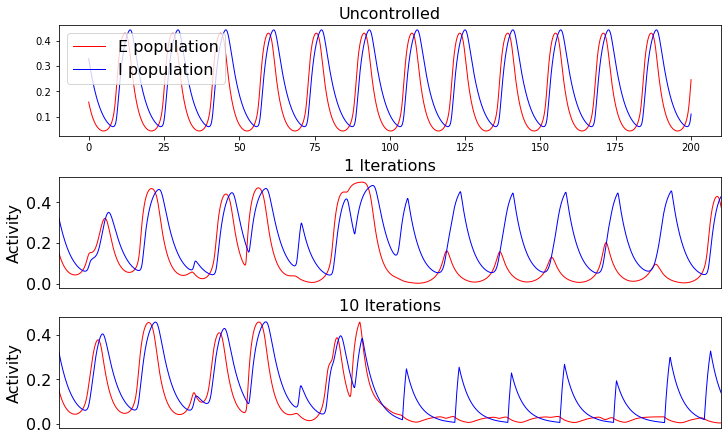

In [61]:
wc_controlled_noisefree.optimize(9)

state_list.append(wc_controlled_noisefree.get_xs() )
control_noisefree = wc_controlled_noisefree.control

plot_singlenode(wc_controlled_noisefree.model, duration, dt, state_list, target)

Compute control for a deterministic system
Cost in iteration 0: 8.266349582638368
Cost in iteration 1: 6.88029316384319
Cost in iteration 2: 6.0120526945153125
Cost in iteration 3: 5.0714660580884905
Cost in iteration 4: 4.249186093362789
Cost in iteration 5: 3.599915152610497
Cost in iteration 6: 2.9411010680441496
Cost in iteration 7: 2.3460265474482416
Cost in iteration 8: 1.9488545413178726
Cost in iteration 9: 1.7180212007510591
Cost in iteration 10: 1.6023346865015806
Cost in iteration 11: 1.546199550684302
Cost in iteration 12: 1.0981824013266925
Cost in iteration 13: 1.0032936199539115
Cost in iteration 14: 0.8018647939398063
Cost in iteration 15: 0.6328994360308635
Cost in iteration 16: 0.550297093678998
Cost in iteration 17: 0.43661056552272176
Cost in iteration 18: 0.41161460707164205
Cost in iteration 19: 0.3528161308989688
Cost in iteration 20: 0.35100101537324824
Cost in iteration 21: 0.3497038009544745
Cost in iteration 22: 0.3330016870943716
Cost in iteration 23: 0.3233

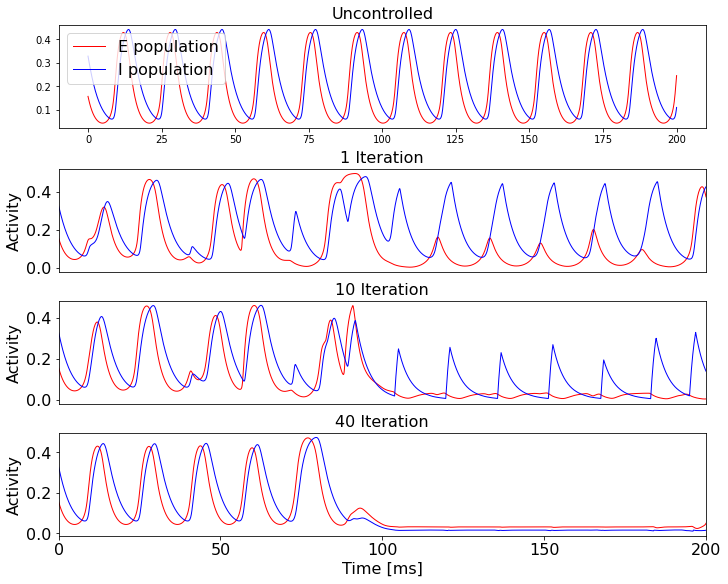

In [ ]:
wc_controlled_noisefree.optimize(30)

state_list.append(wc_controlled_noisefree.get_xs() )
control_noisefree = wc_controlled_noisefree.control

plot_singlenode(wc_controlled_noisefree.model, duration, dt, state_list, target)